In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
teams = ["BOS", "ATL", "CLE", "LAL", "CHA", "CHI", "MIA"]
shoot = np.array([random.randint(10, 20) for i in range(len(teams))])
turnovers = np.array([random.randint(5, 10) for i in range(len(teams))])
blocks = np.array([random.randint(2, 10) for i in range(len(teams))])
assists = np.array([random.randint(15, 30) for i in range(len(teams))])
steals = np.array([random.randint(1, 4) for i in range(len(teams))])
statNames = ["FGA", "Turnovers", "Blocks", "Assists", "Steals"]
data = np.array([shoot, turnovers, blocks, assists, steals])

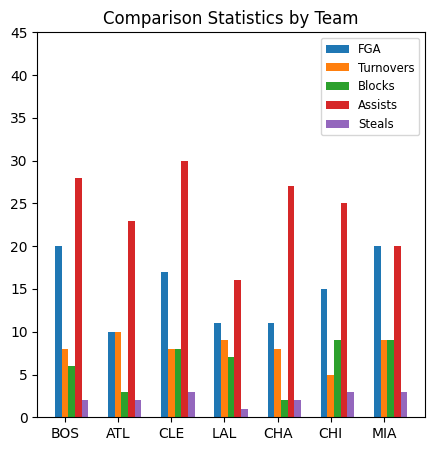

In [ ]:
# teamArr is the input of team names see above
# statsNameArr is the input of the names of the statistics that the user wants displayed
# stats2DArr is the actual data of the statistics that will be used to plot

# this can be used to display PLAYER OR TEAM data of multiple stats
def visualize_data(teamArr, statsNameArr, stats2DArr):
  # measure the length of the passed in lists
  teamLen = len(teamArr)
  nameLen = len(statsNameArr)
  statsLen = len(stats2DArr)

  # declare some constants
  multiplier = 0

  # What x is equivalent to depends on the value of statsLen
  if statsLen < 3:
    width = .5
    x = np.arange(0, teamLen)

  elif statsLen < 5:
    width = .3
    x = np.arange(0, teamLen*1.5, 1.5)

  elif statsLen < 8:
    width = .25
    x = np.arange(0, teamLen*2, 2)

  fig, ax = plt.subplots(figsize= (5, 5))

  for i in range(statsLen):
    # iterate through the 2D array making a subplot with each
    offset = width * multiplier
    barPiece = ax.bar(x + offset, stats2DArr[i], width, label=statsNameArr[i])
    multiplier += 1

  ax.set_title("Comparison Statistics by Team")
  ax.legend(loc="upper right", fontsize="small")
  ax.set_xticks(x + width, teamArr)
  ax.set_ylim(0, np.max(stats2DArr) * 1.5)

  plt.savefig("bargraph.png")
  plt.show()
  plt.close(fig)

visualize_data(teams, statNames, data)

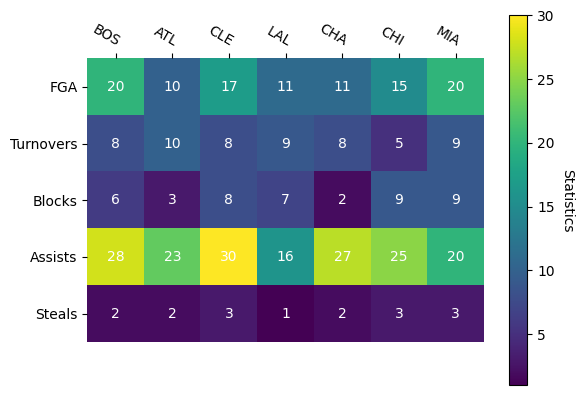

In [ ]:
# Heat map of player capabilities
# Accepts a list of players/stat names/stats
# New Question: How do we create heat map from given data format?

def visualize_heatmap(teamArr, statsNameArr, stats2DArr):

  # Constant length values of the different input arrays
  teamLen = len(teamArr)
  nameLen = len(statsNameArr)
  statsLen = len(stats2DArr)

  # Create
  ax = plt.gca()

  # create heat map on data with specified color (cmap argument)
  im = ax.imshow(stats2DArr, cmap="viridis")

  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel(ylabel="Statistics", rotation=-90, va="bottom")

  ax.set_xticks(np.arange(stats2DArr.shape[1]), labels=teamArr)
  ax.set_yticks(np.arange(stats2DArr.shape[0]), labels=statsNameArr)

  # Let the horizontal axes labeling appear on top.
  ax.tick_params(top=True, bottom=False,
                  labeltop=True, labelbottom=False)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
            rotation_mode="anchor")

  # Gets rid of grid lines
  ax.spines[:].set_visible(False)

  ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
  ax.tick_params(which="minor", bottom=False, left=False)

  for i in range(nameLen):
    for j in range(teamLen):
        text = ax.text(j, i, stats2DArr[i, j],
                       ha="center", va="center", color="white")

  plt.savefig('team_heatmap.png')
  plt.show()
  plt.close()


my_img = visualize_heatmap(teams, statNames, data)